In [2]:
import pandas as pd
import regex
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('./scrape.csv', thousands=',')
df.head(10)

,ID,Name,Nationality,Date Of Birth,Height,Position,Appearances,Wins,Losses,Saves,...,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Club
0,1,David Seaman,England,19/09/1963,193cm,Goalkeeper,344,171,73,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Alan Miller,England,29/03/1970,191cm,Goalkeeper,25,5,13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Tony Adams,England,10/10/1966,191cm,Defender,255,132,56,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Colin Pates,England,10/08/1961,183cm,Defender,7,4,2,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Gavin McGowan,England,16/01/1976,180cm,Defender,6,2,4,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Pal Lydersen,Norway,10/09/1965,183cm,Defender,8,0,5,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Steve Morrow,Northern Ireland,02/07/1970,183cm,Defender,60,26,21,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,David O'Leary,Ireland,02/05/1958,186cm,Defender,21,7,7,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Steve Bould,England,16/11/1962,193cm,Defender,196,89,49,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Scott Marshall,Scotland,01/05/1973,185cm,Defender,26,10,11,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
x = []
y = []

for col in df.columns:
    na_count = df[col].isna().sum()
    x.append(col)
    y.append(0 if na_count == 0 else round(na_count/len(df[col])*100))

In [34]:
[i for i in df.columns if not pd.isna(df[i][0])]


['ID',
 'Name',
 'Nationality',
 'Date Of Birth',
 'Height',
 'Position',
 'Appearances',
 'Wins',
 'Losses',
 'Saves',
 'Penalties Saved',
 'Punches',
 'High Claims',
 'Catches',
 'Sweeper clearances',
 'Throw outs',
 'Goal Kicks',
 'Clean sheets',
 'Goals Conceded',
 'Errors leading to goal',
 'Own goals',
 'Yellow cards',
 'Red cards',
 'Fouls',
 'Goals',
 'Assists',
 'Passes',
 'Passes per match',
 'Accurate long balls']

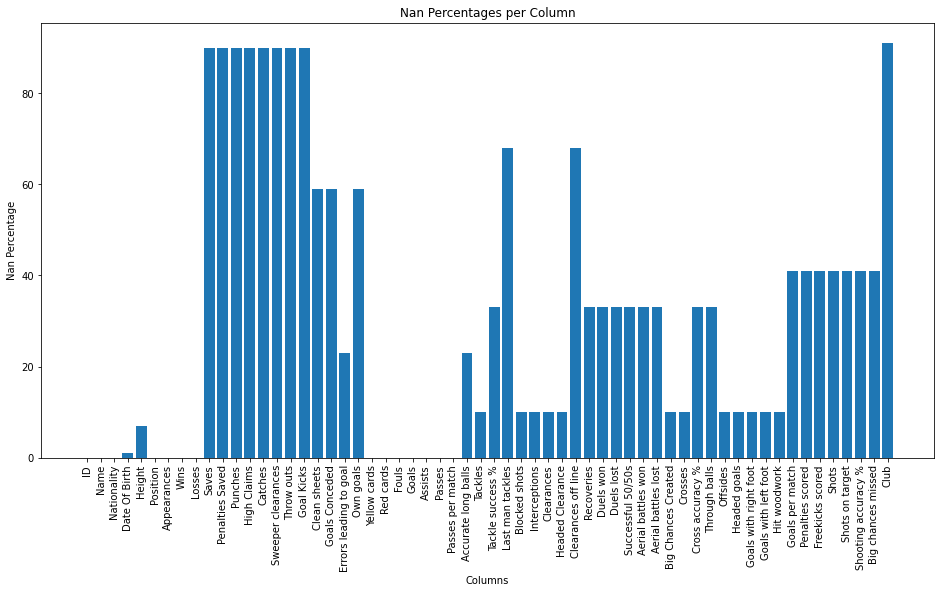

In [5]:
fig, ax = plt.subplots(1,1 )
fig.set_size_inches(16, 8)
ax.bar(range(len(x)), y, )
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation='vertical', fontsize=10)
ax.set_title("Nan Percentages per Column")
ax.set_xlabel("Columns")
ax.set_ylabel("Nan Percentage")
plt.show()

In [6]:
df['Goals per match'] = (df['Goals'] / df['Appearances']).round(2).fillna(0)
df['Date Of Birth'] = df['Date Of Birth'].fillna("DOB Not Available").apply(
    lambda x: (x if '(' not in x else regex.sub(r' \(\d+\)', '', x)))
df['Height'] = df['Height'].apply(lambda x: x if type(x) == float else int(x[:-2]))
df['Height'] = df['Height'].fillna(df["Height"].mean()).apply(lambda x: int(x))
df['Club'] = df['Club'].fillna('No Current Club')

float_columns = df.select_dtypes(include=[np.float]).columns
percent_columns = list(filter(lambda x: '%' in x, df.columns))

df[float_columns] = df[float_columns].fillna(0)
df[percent_columns] = df[percent_columns].fillna("0%").apply(lambda x: [int(p[:-1]) for p in x])


In [7]:
df.head(10)

,ID,Name,Nationality,Date Of Birth,Height,Position,Appearances,Wins,Losses,Saves,...,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Club
0,1,David Seaman,England,19/09/1963,193,Goalkeeper,344,171,73,6.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,No Current Club
1,2,Alan Miller,England,29/03/1970,191,Goalkeeper,25,5,13,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,No Current Club
2,3,Tony Adams,England,10/10/1966,191,Defender,255,132,56,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0,0.0,No Current Club
3,4,Colin Pates,England,10/08/1961,183,Defender,7,4,2,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,No Current Club
4,5,Gavin McGowan,England,16/01/1976,180,Defender,6,2,4,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,No Current Club
5,6,Pal Lydersen,Norway,10/09/1965,183,Defender,8,0,5,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,No Current Club
6,7,Steve Morrow,Northern Ireland,02/07/1970,183,Defender,60,26,21,0.0,...,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0,0.0,No Current Club
7,8,David O'Leary,Ireland,02/05/1958,186,Defender,21,7,7,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.0,No Current Club
8,9,Steve Bould,England,16/11/1962,193,Defender,196,89,49,0.0,...,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0,0.0,No Current Club
9,10,Scott Marshall,Scotland,01/05/1973,185,Defender,26,10,11,0.0,...,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0,0.0,No Current Club


In [8]:
with open('clean.json', 'w') as f:
    df.to_json(f)